<a href="https://colab.research.google.com/github/karanpk02/TASK_7/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 10**
You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.

The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.

But the shared drive folder have the dataset for your convenience
perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.

Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

#**Importing Packages**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#for scaling the data
from sklearn.preprocessing import StandardScaler
#for distances
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [ ]:
df = pd.read_csv('trainKNN.txt')
df.shape

(195, 11)

##From the website of given dataset, we have
**Attribute Information:**
*****

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  * 1 building_windows_float_processed
  * 2 building_windows_non_float_processed
  * 3 vehicle_windows_float_processed
  * 4 vehicle_windows_non_float_processed (none in this database)
  * 5 containers
  * 6 tableware
  * 7 headlamps


In [ ]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df.columns = attributes
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Drop the Id column

In [ ]:
df=df.drop(['Id'], axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Analyzing the data

In [ ]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_Of_Glass    0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(194, 10)

Clearly it shows that one duplicate row.

Also no encoding needed.

##**Outliers Exist or not**

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
RI,194.0,1.518261,0.003052,1.51131,1.516452,1.51762,1.51891,1.53393
Na,194.0,13.369536,0.784643,10.73000,12.872500,13.27000,13.78750,15.79000
Mg,194.0,2.744588,1.392113,0.00000,2.307500,3.48000,3.60000,3.98000
Al,194.0,1.461237,0.488409,0.29000,1.192500,1.36500,1.62750,3.50000
Si,194.0,72.644278,0.762458,69.81000,72.332500,72.82000,73.08000,75.18000
K,194.0,0.523866,0.674713,0.00000,0.152500,0.56000,0.61000,6.21000
Ca,194.0,8.908144,1.427999,5.43000,8.220000,8.56500,9.07750,16.19000
Ba,194.0,0.165928,0.487416,0.00000,0.000000,0.00000,0.00000,3.15000
Fe,194.0,0.050773,0.086653,0.00000,0.000000,0.00000,0.09000,0.34000
Type_Of_Glass,194.0,2.685567,2.066034,1.00000,1.000000,2.00000,3.00000,7.00000


In [ ]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column RI outliers = 8.25%
Column Na outliers = 3.09%
Column Mg outliers = 18.04%
Column Al outliers = 8.25%
Column Si outliers = 6.19%
Column K outliers = 3.61%
Column Ca outliers = 11.86%
Column Ba outliers = 100.00%
Column Fe outliers = 7.22%
Column Type_Of_Glass outliers = 16.49%


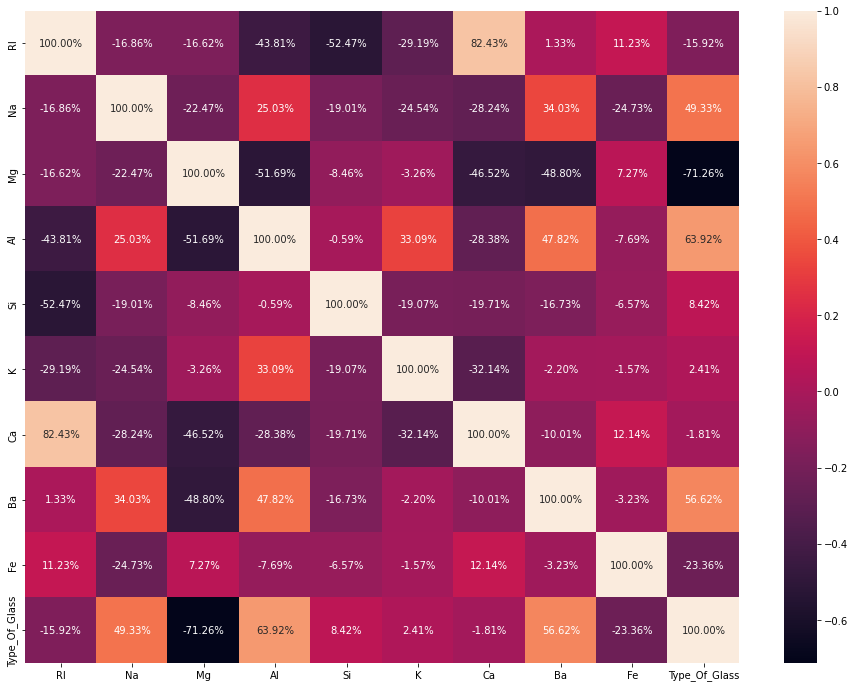

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')
# plt.savefig('../images/features_correlation.png')

###Better correlatin for Type_Of_Glass with Al, Ba and Na.

##**kNN model**

In [ ]:
b = []
for i in df.keys():
  b.append(i)
print(b) 

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_Of_Glass']


In [ ]:
b.remove('Type_Of_Glass')
print(b)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


####**Now we are taking the feature set as `b`**

In [ ]:
X = df[b].values#array of features
y = df['Type_Of_Glass'].values

####**Splitting of data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

####**Scaling of data**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##**Initializing and fitting the k-NN model by splitting the train data**

###**BY EUCLIDEAN METRIC**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.sqeuclidean) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=4))) #predicting using the model

K value  :  1  score :  0.6710526315789473
K value  :  2  score :  0.6968623481781377
K value  :  3  score :  0.7162618083670715
K value  :  4  score :  0.7032726045883941
K value  :  5  score :  0.6837044534412956
K value  :  6  score :  0.6778002699055331
K value  :  7  score :  0.6516531713900136
K value  :  8  score :  0.6518218623481782
K value  :  9  score :  0.6580634278002699
K value  :  10  score :  0.6449055330634278
K value  :  20  score :  0.6126855600539811
K value  :  25  score :  0.5996963562753037
K value  :  30  score :  0.5357624831309042
K value  :  35  score :  0.5035425101214575
K value  :  40  score :  0.4974696356275303
K value  :  45  score :  0.45833333333333337
K value  :  50  score :  0.43876518218623484


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric=distance.sqeuclidean) #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=4)))

Train Accuracy :  0.7548387096774194
Val Accuracy :  0.6837044534412956


68% accuracy in Euclidean metric

####**Test the model using testing data**

In [ ]:
df1 = pd.read_csv('testKNN.txt')

In [ ]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df1.columns = attributes
df1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [ ]:
df2=df1.drop(['Id'], axis=1)
df2=df2.drop(['Type_Of_Glass'], axis=1)
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35


In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
x_test
type(x_test)

numpy.ndarray

In [ ]:
df2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [ ]:
df2 = df2.values

In [ ]:
df2

array([[1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.26500e+01,
        1.60000e-01, 8.89000e+00, 1.50000e-01, 2.40000e-01],
       [1.52211e+00, 1.41900e+01, 3.78000e+00, 9.10000e-01, 7.

In [ ]:
df2_test = scaler.transform(df2)

In [ ]:
results = knn.predict(df2_test)

In [ ]:
print(results)

[1 1 2 1 2 1 2 1 5 2 2 5 2 7 7 7 7]


In [ ]:
df1['Type_Of_Glass_pred'] = results

In [ ]:
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
5,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
6,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
7,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
8,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5
9,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


###**BY MANHATTAN METRIC**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.cityblock) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=4))) #predicting using the model

K value  :  1  score :  0.7096828609986505
K value  :  2  score :  0.696693657219973
K value  :  3  score :  0.7096828609986505
K value  :  4  score :  0.7031039136302294
K value  :  5  score :  0.6643049932523617
K value  :  6  score :  0.690114709851552
K value  :  7  score :  0.6707152496626181
K value  :  8  score :  0.6837044534412956
K value  :  9  score :  0.6837044534412956
K value  :  10  score :  0.690114709851552
K value  :  20  score :  0.6710526315789473
K value  :  25  score :  0.6384952766531713
K value  :  30  score :  0.606612685560054
K value  :  35  score :  0.5489203778677463
K value  :  40  score :  0.5032051282051282
K value  :  45  score :  0.47098515519568146
K value  :  50  score :  0.45158569500674767


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,metric=distance.cityblock) #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=4)))

Train Accuracy :  0.7096774193548387
Val Accuracy :  0.690114709851552


69% accuracy in manhattan

####**Test the model using testing data**

In [ ]:
df1 = pd.read_csv('testKNN.txt')

In [ ]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df1.columns = attributes
df1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [ ]:
df2=df1.drop(['Id'], axis=1)
df2=df2.drop(['Type_Of_Glass'], axis=1)
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35


In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
x_test
type(x_test)

numpy.ndarray

In [ ]:
df2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [ ]:
df2 = df2.values

In [ ]:
df2

array([[1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.26500e+01,
        1.60000e-01, 8.89000e+00, 1.50000e-01, 2.40000e-01],
       [1.52211e+00, 1.41900e+01, 3.78000e+00, 9.10000e-01, 7.

In [ ]:
df2_test = scaler.transform(df2)

In [ ]:
results = knn.predict(df2_test)

In [ ]:
print(results)

[1 1 2 1 2 1 2 1 2 2 2 5 6 7 7 7 7]


In [ ]:
df1['Type_Of_Glass_pred'] = results

In [ ]:
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
5,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
6,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
7,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
8,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,2
9,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


#**Again initialize and fitting k-NN model by without splitting training data and Clean the outliers from the features**
******

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column RI outliers = 8.25%
Column Na outliers = 3.09%
Column Mg outliers = 18.04%
Column Al outliers = 8.25%
Column Si outliers = 6.19%
Column K outliers = 3.61%
Column Ca outliers = 11.86%
Column Ba outliers = 100.00%
Column Fe outliers = 7.22%
Column Type_Of_Glass outliers = 16.49%


In [ ]:
def floorcapping(df):
  i = input()
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
  x = pd.DataFrame(x) # convert to data frame
  # df[x.isin([True])]
  substring = 'True'
  y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
  if True in y[i].tolist():
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i])) 
  # substitute upper and lower whiskes to outliers
floorcapping(df)

Mg


In [ ]:
floorcapping(df)

Ca


In [ ]:
floorcapping(df)

Al


In [ ]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers present in the data of RI
-------------------------------
Outliers present in the data of Na
-------------------------------
Outliers  not present in the data of in Mg
-------------------------------
Outliers  not present in the data of in Al
-------------------------------
Outliers present in the data of Si
-------------------------------
Outliers present in the data of K
-------------------------------
Outliers  not present in the data of in Ca
-------------------------------
Outliers present in the data of Ba
-------------------------------
Outliers present in the data of Fe
-------------------------------
Outliers present in the data of Type_Of_Glass
-------------------------------


In [ ]:
x_train = df.drop(['Type_Of_Glass'], axis=1)
x_train = x_train.values
x_train

array([[ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       [ 1.51766, 13.21   ,  3.69   , ...,  8.22   ,  0.     ,  0.     ],
       ...,
       [ 1.5164 , 14.37   ,  0.36875, ...,  9.45   ,  0.54   ,  0.     ],
       [ 1.51623, 14.14   ,  0.36875, ...,  9.18   ,  1.06   ,  0.     ],
       [ 1.51685, 14.92   ,  0.36875, ...,  8.4    ,  1.59   ,  0.     ]])

In [ ]:
y_train = df['Type_Of_Glass']
y_train = y_train.values
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

##**Initializing and fitting the k-NN model**

###**BY EUCLIDEAN METRIC**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.sqeuclidean) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6))) #predicting using the model

K value  :  1  score :  0.6647727272727273
K value  :  2  score :  0.6805555555555557
K value  :  3  score :  0.6702967171717171
K value  :  4  score :  0.654513888888889
K value  :  5  score :  0.6647727272727273
K value  :  6  score :  0.6751893939393939
K value  :  7  score :  0.6549873737373737
K value  :  8  score :  0.664614898989899
K value  :  9  score :  0.6597222222222222
K value  :  10  score :  0.6597222222222222
K value  :  20  score :  0.6182133838383838
K value  :  25  score :  0.602746212121212
K value  :  30  score :  0.5823863636363636
K value  :  35  score :  0.5820707070707071
K value  :  40  score :  0.5460858585858586
K value  :  45  score :  0.52572601010101
K value  :  50  score :  0.49936868686868685


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6,metric=distance.sqeuclidean) #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6)))

Train Accuracy :  0.7783505154639175
Val Accuracy :  0.6751893939393939


67% accuracy in Euclidean metric.

####**Test the model using testing data**

In [ ]:
df1 = pd.read_csv('testKNN.txt')

In [ ]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df1.columns = attributes
df1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [ ]:
df2=df1.drop(['Id'], axis=1)
df2=df2.drop(['Type_Of_Glass'], axis=1)
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35


In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
x_test
type(x_test)

numpy.ndarray

In [ ]:
df2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [ ]:
df2 = df2.values

In [ ]:
df2

array([[1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.26500e+01,
        1.60000e-01, 8.89000e+00, 1.50000e-01, 2.40000e-01],
       [1.52211e+00, 1.41900e+01, 3.78000e+00, 9.10000e-01, 7.

In [ ]:
df2_test = scaler.transform(df2)

In [ ]:
results = knn.predict(df2_test)

In [ ]:
print(results)

[1 1 2 1 2 1 2 1 5 2 2 5 2 7 7 7 7]


In [ ]:
df1['Type_Of_Glass_pred'] = results

In [ ]:
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
5,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
6,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
7,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
8,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5
9,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


###**BY MANHATTAN METRIC**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.cityblock) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6))) #predicting using the model

K value  :  1  score :  0.670138888888889
K value  :  2  score :  0.6803977272727272
K value  :  3  score :  0.6805555555555557
K value  :  4  score :  0.6750315656565657
K value  :  5  score :  0.7007575757575758
K value  :  6  score :  0.6698232323232324
K value  :  7  score :  0.6702967171717171
K value  :  8  score :  0.685763888888889
K value  :  9  score :  0.6699810606060606
K value  :  10  score :  0.6702967171717171
K value  :  20  score :  0.6336805555555556
K value  :  25  score :  0.6387310606060607
K value  :  30  score :  0.6182133838383838
K value  :  35  score :  0.6128472222222222
K value  :  40  score :  0.5877525252525252
K value  :  45  score :  0.5464015151515151
K value  :  50  score :  0.5252525252525252


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,metric=distance.cityblock) #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6)))

Train Accuracy :  0.7680412371134021
Val Accuracy :  0.685763888888889


68% in Manhattan metric.

####**Test the model using testing data**

In [ ]:
df1 = pd.read_csv('testKNN.txt')

In [ ]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df1.columns = attributes
df1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [ ]:
df2=df1.drop(['Id'], axis=1)
df2=df2.drop(['Type_Of_Glass'], axis=1)
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35


In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
x_test
type(x_test)

numpy.ndarray

In [ ]:
df2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [ ]:
df2 = df2.values

In [ ]:
df2

array([[1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.26500e+01,
        1.60000e-01, 8.89000e+00, 1.50000e-01, 2.40000e-01],
       [1.52211e+00, 1.41900e+01, 3.78000e+00, 9.10000e-01, 7.

In [ ]:
df2_test = scaler.transform(df2)

In [ ]:
results = knn.predict(df2_test)

In [ ]:
print(results)

[1 1 2 1 1 1 1 1 5 2 2 5 2 7 7 7 7]


In [ ]:
df1['Type_Of_Glass_pred'] = results

In [ ]:
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,1
5,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
6,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,1
7,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
8,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5
9,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


#**Conclusions**

I experimented the given data in two ways,

1. Initialize and fitting k-NN model by splitting training data
   
   * By using Euclidean metric :- 68%
   * By using Manhattan metric :- 69%


2. Again initialize and fitting k-NN model by without splitting training data and Clean the outliers from the features
  
  * By using Euclidean metric :- 67%
  * By using Manhattan metric :- 68%

In all of the above models they did't predict the glasses in 3rd and 4th class.  